<a href="https://colab.research.google.com/github/ValentineKarimi/Moringa-Week-6-Core-IP/blob/master/Valentinre_Karimi_Moringa_Week6_CoreIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Defining the Question**
#a) **Specifying the Question**

I have been recruited as a football analyst in a company called Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).


#b)  **Defining the Metric for Success**

***Metric 1***

 Predict how many goals the home team scores.

 Predict how many goals the away team scores.

***Metric 2***

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

#c) **Understanding the context**

The rankings are used to rank the progression and current ability of the football teams , and claims that they create "a reliable measure for comparing  A-teams". They are used as part of the calculation for prediction of future scores 


#d) **Recording the Experimental Design**


1.   Reading and Checking the Data
2.   External Data Source Validation
3.   Tidying the Dataset
4.   Feature Engineering
5.   Exploratory Analysis
6.  Implementing the Solution
7.  Challenging the solution
8.  Follow-up questions

#e) **Data Relevance**
There are 2 datasets - FIFA ranking and results 

***FIFA Ranking Columns ***

Rank
Country Abbreviation

Total Points

Previous Points

Rank Change

Average Previous Years Points

Average Previous Years Points Weighted (50%)

Average 2 Years Ago Points

Average 2 Years Ago Points Weighted (30%)

Average 3 Years Ago Points

Average 3 Years Ago Points Weighted (20%)

Confederation

***Results dataset column ***

Date - date of the match

Home_team - the name of the home team

Away_team - the name of the away team

Home_score - full-time home team score including extra time, not including penalty-shootouts

Away_score - full-time away team score including extra time, not including penalty-shootouts

Tournament - the name of the tournament

City - the name of the city where the match was played

Country - the name of the country where the match was played

Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue




##Reading and checking the data  

In [846]:
#Importing libraries 
import pandas as pd                             #import pandas
import numpy as np                              #import numpy
import seaborn as sns                           #seaborn for visuals
import matplotlib.pyplot as plt                 #matplot for plotting
import datetime as dt                           #convert date formats
from scipy import stats 

In [847]:
#loading datasets
result = pd.read_csv('results.csv')
ranking = pd.read_csv('fifa_ranking.csv')

In [848]:
# Check The number of records in datasets
print('Fifa ranking dataset has ',ranking.shape[0],'records and ', ranking.shape[1], 'rows' )
print('Result dataset has ', result.shape[0],'recrods and ', result.shape[1], 'rows')

Fifa ranking dataset has  57793 records and  16 rows
Result dataset has  40839 recrods and  9 rows


In [849]:

# Previeing the top part of the datasets 
display("FIFA Ranking of teams")
display(ranking.head(3))
display("FIFA Results of teams")
display(result.head(3))

'FIFA Ranking of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


'FIFA Results of teams'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [850]:
# Previewing the bottom part of the datasets 
display("FIFA Ranking of teams")
display(ranking.tail(3))
display("FIFA Results of teams")
display(result.tail(3))

'FIFA Ranking of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


'FIFA Results of teams'

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [851]:
# Check  information on datatypes of datasets 
display("FIFA Results")
display(result.info())
display("FIFA Ranking")
display(ranking.info())

'FIFA Results'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


None

'FIFA Ranking'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

None

In [852]:
#Checking the columns in datasets
display("FIFA Ranking of teams")
display(ranking.columns)
display("FIFA Results of teams")
display(result.columns) 


'FIFA Ranking of teams'

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

'FIFA Results of teams'

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [853]:
#Rename rank_date to date for easier merging 
rankings = ranking.rename(columns={"rank_date": "date"})
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [854]:

#SET THE date_time as the index

import datetime 
from datetime import  datetime
rankings.date.sort_values(ascending=True)
rankings.set_index(pd.DatetimeIndex(rankings['date']), drop=True, inplace = True)
result.date.sort_values(ascending=True)
result.set_index(pd.DatetimeIndex(result['date']), drop=True, inplace = True)
print(result.head())
print(result.tail())
print(rankings.head())
print(rankings.tail())

                  date home_team away_team  ...     city   country neutral
date                                        ...                           
1872-11-30  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1873-03-08  1873-03-08   England  Scotland  ...   London   England   False
1874-03-07  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
1875-03-06  1875-03-06   England  Scotland  ...   London   England   False
1876-03-04  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]
                  date         home_team  ... country  neutral
date                                      ...                 
2019-07-18  2019-07-18    American Samoa  ...   Samoa     True
2019-07-18  2019-07-18              Fiji  ...   Samoa     True
2019-07-19  2019-07-19           Senegal  ...   Egypt     True
2019-07-19  2019-07-19        Tajikistan  ...   India     True
2019-07-20  2019-07-20  Papua New Guinea  ...   Samoa     True

[5 rows x 9

Merging the dataset

In [855]:
# Merge two Dataframes on index of both the dataframes
mergeddata = rankings.merge(result, left_index=True, right_index=True)

In [856]:
# Previewing the bottom part of the datasets 
display("FIFA Ranking and Results of teams")
display(mergeddata.head(3))
display(mergeddata.tail(3))

'FIFA Ranking and Results of teams'

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_x,date_y,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,,,,,,,,,,,,,,,,,,
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_x,date_y,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018-06-07,Cascadia,Western Armenia,4,0,CONIFA World Football Cup,Bromley,England,True
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018-06-07,Northern Cyprus,Padania,3,2,CONIFA World Football Cup,Carshalton,England,True
2018-06-07,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,Carshalton,England,True


In [857]:
# Check The number of records in merged dataset
#Checking information in merged dataset
#Checking columns in merged dataset
print('Merged dataset has ',mergeddata.shape[0],'records and ', mergeddata.shape[1], 'rows' )
print(mergeddata.info())
print(mergeddata.columns)

Merged dataset has  212831 records and  25 rows
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212831 entries, 1993-08-08 to 2018-06-07
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     212831 non-null  int64  
 1   country_full             212831 non-null  object 
 2   country_abrv             212831 non-null  object 
 3   total_points             212831 non-null  float64
 4   previous_points          212831 non-null  int64  
 5   rank_change              212831 non-null  int64  
 6   cur_year_avg             212831 non-null  float64
 7   cur_year_avg_weighted    212831 non-null  float64
 8   last_year_avg            212831 non-null  float64
 9   last_year_avg_weighted   212831 non-null  float64
 10  two_year_ago_avg         212831 non-null  float64
 11  two_year_ago_weighted    212831 non-null  float64
 12  three_year_ago_avg       212831 non-null  float64


In [858]:
#Dropping irrelevant columns 
to_drop = [ 'country_abrv','rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date_x', 'date_y']
mergeddata.drop(to_drop, axis=1,inplace=True)

In [859]:

# Selecting the ranking details of the home teams only
#
home_teams = mergeddata[mergeddata.home_team == mergeddata.country_full]
#previewing the first five rows of the home_teams
#
home_teams.shape

(957, 12)

In [860]:

# Selecting the ranking details of the away teams only
#
away_teams = mergeddata[mergeddata.away_team == mergeddata.country_full]
#previewing the first five rows of the away_teams
#
away_teams.shape

(933, 12)

In [861]:
# Merging the home_teams dataframe to the away_teams dataframe
# The two dataframes have been merged on date, home_team and away_team columns
#
final_df = pd.merge(home_teams, away_teams, how = 'left' , left_on =['date', 'home_team', 'away_team'],\
                    right_on = ['date', 'home_team', 'away_team'])

In [862]:
final_df

,rank_x,country_full_x,total_points_x,previous_points_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,rank_y,country_full_y,total_points_y,previous_points_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
date,,,,,,,,,,,,,,,,,,,,,,
1993-08-08,8,Brazil,0.00,55,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14.0,Mexico,0.00,42.0,1.0,1.0,Friendly,Maceió,Brazil,False
1993-08-08,35,Ecuador,0.00,23,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94.0,Venezuela,0.00,4.0,5.0,0.0,FIFA World Cup qualification,Quito,Ecuador,False
1993-08-08,50,Zimbabwe,0.00,27,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-08,59,Bolivia,0.00,13,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22.0,Uruguay,0.00,47.0,3.0,1.0,FIFA World Cup qualification,La Paz,Bolivia,False
1993-08-08,65,Guinea,0.00,23,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86.0,Sierra Leone,0.00,16.0,1.0,0.0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-07,4,Portugal,1273.69,1306,Portugal,Algeria,3,0,Friendly,Lisbon,Portugal,False,66.0,Algeria,473.83,499.0,3.0,0.0,Friendly,Lisbon,Portugal,False
2018-06-07,12,England,1050.84,1040,England,Costa Rica,2,0,Friendly,Leeds,England,False,23.0,Costa Rica,884.04,858.0,2.0,0.0,Friendly,Leeds,England,False
2018-06-07,14,Uruguay,1018.41,976,Uruguay,Uzbekistan,3,0,Friendly,Montevideo,Uruguay,False,95.0,Uzbekistan,353.91,381.0,3.0,0.0,Friendly,Montevideo,Uruguay,False


In [863]:
#Dropping irrelevant columns 
to_drop = ['country_full_x','country_full_y','home_score_y',
       'away_score_y', 'tournament_y', 'city_y', 'country_y', 'neutral_y' ]
final_df.drop(to_drop, axis=1,inplace=True)

In [864]:
final_df.head()

,rank_x,total_points_x,previous_points_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,rank_y,total_points_y,previous_points_y
date,,,,,,,,,,,,,,
1993-08-08,8,0.0,55,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,14.0,0.0,42.0
1993-08-08,35,0.0,23,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,94.0,0.0,4.0
1993-08-08,50,0.0,27,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False,NaN,NaN,NaN
1993-08-08,59,0.0,13,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,22.0,0.0,47.0
1993-08-08,65,0.0,23,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,86.0,0.0,16.0


In [865]:
#Rearrage and Renaming columns
df2=final_df.reindex(columns= ['home_team', 'away_team', 'home_score_x', 'away_score_x','rank_x', 'rank_y','total_points_x','total_points_y' ,'previous_points_x', 'previous_points_y',
    'neutral_x','tournament_x', 'city_x', 'country_x'])
# changing cols with rename() 
new_data = df2.rename(columns = {"home_score_x": "home_score", 
                                  "away_score_x":"away_score", 
                                  "rank_x": "home rank",
                                 "rank_y": "away rank",
                                 "tournament_x" : "tournament_type",
                                 'total_points_x' : "home_total_points",
                                 'total_points_y' : "away_total_points" ,
                                 'previous_points_x': "home_previous_points",
                                 'previous_points_y' : "away_previous_points",
                                 "neutral_x" : "neutral",
                                 "city_x" : "city",
                                 "country_x": "country"}) 
  
new_data.head()


,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country
date,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador
1993-08-08,Zimbabwe,Eswatini,2,0,50,NaN,0.0,NaN,27,NaN,False,Friendly,Harare,Zimbabwe
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea


In [866]:
# Creating a year column from the datetime index
#
new_data['date'] =new_data.index
new_data['year']= new_data.date.dt.year
to_drop = ['date']
new_data.drop(to_drop, axis=1,inplace=True)
new_data.head()

,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country,year
date,,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil,1993
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador,1993
1993-08-08,Zimbabwe,Eswatini,2,0,50,NaN,0.0,NaN,27,NaN,False,Friendly,Harare,Zimbabwe,1993
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia,1993
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea,1993


## External Data Source Validation 

In [906]:
print(new_data.mean())
print(new_data.mode())
print(new_data.median())
print(new_data.var())
print(new_data.std())


home_score                 1.632606
away_score                 1.004592
home rank                 65.549943
away rank                 69.918485
home_total_points         38.543123
away_total_points         30.606923
home_previous_points     464.027555
away_previous_points     448.623421
neutral                    0.158439
tournament_type            1.058553
year                    2004.789897
score                      0.628014
status                     1.222732
dtype: float64
  home_team  away_team  home_score  ...    year  score  status
0    Mexico  Argentina         1.0  ...  2010.0    0.0     2.0
1       NaN    Uruguay         NaN  ...     NaN    NaN     NaN
2       NaN        NaN         NaN  ...     NaN    NaN     NaN

[3 rows x 17 columns]
home_score                 1.0
away_score                 1.0
home rank                 58.0
away rank                 61.0
home_total_points          0.0
away_total_points          0.0
home_previous_points     485.0
away_previous_points     

https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017


Data alost matches from this 

##Tidying the dataset 

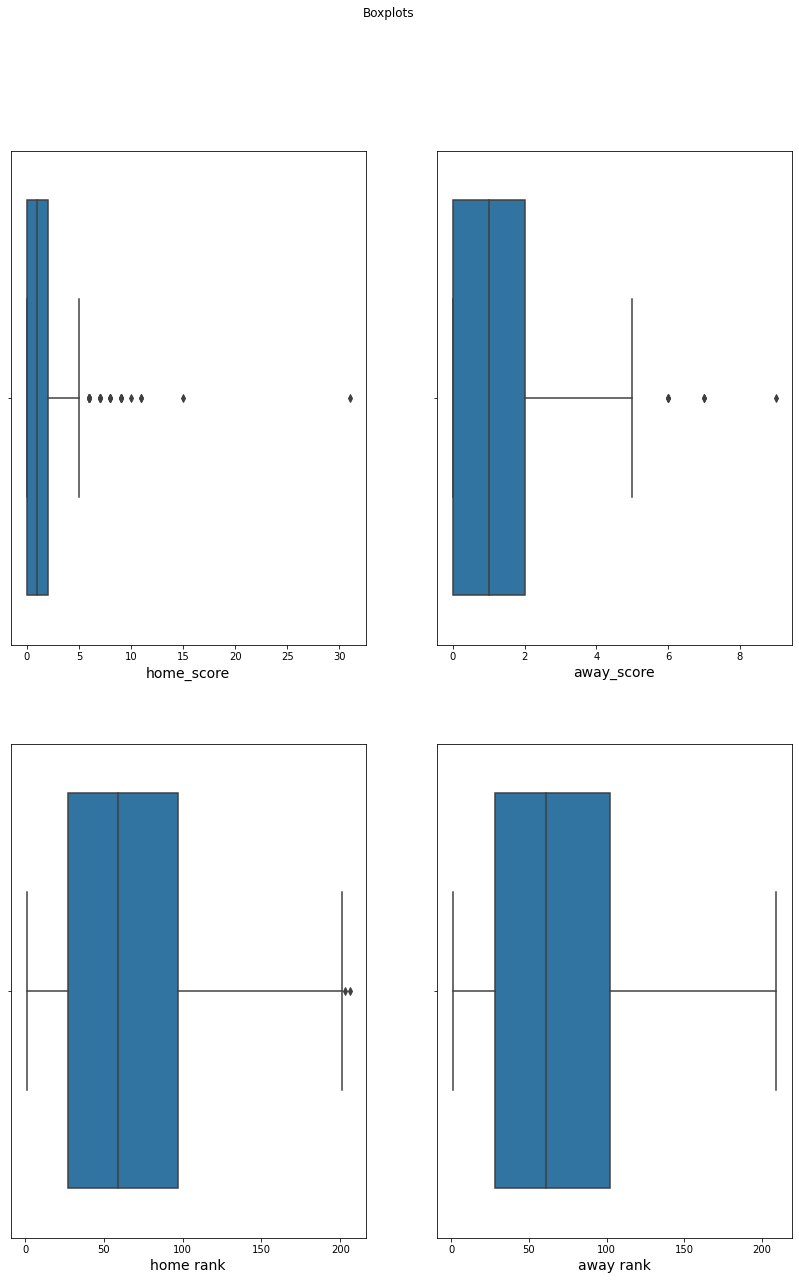

In [867]:
#Detecting outliers

# Checking for Outliers
fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2,2, figsize=(14, 20))
fig.suptitle('Boxplots')
ax1.set_xlabel('xlabel',fontsize=14)
ax2.set_xlabel('xlabel',fontsize=14)
ax3.set_xlabel('xlabel',fontsize=14)
ax4.set_xlabel('xlabel',fontsize=14)

sns.boxplot(new_data['home_score'], ax=ax1)
sns.boxplot(new_data['away_score'], ax=ax2)
sns.boxplot(new_data['home rank'], ax=ax3)
sns.boxplot(new_data['away rank'], ax=ax4)


There seems to be minimal outliers 

In [868]:
#Checking for Anomalies 
# Calculating our first, third quantiles and then later our IQR

#
Q1= new_data.quantile(0.25)
Q3 =new_data.quantile(0.75)
IQR = Q3-Q1
print(Q1)
print('----------------------------------------')
print(Q3)
print('----------------------------------------')
print(IQR)

home_score                 0.0
away_score                 0.0
home rank                 27.0
away rank                 28.0
home_total_points          0.0
away_total_points          0.0
home_previous_points     218.0
away_previous_points     172.5
neutral                    0.0
year                    2000.0
Name: 0.25, dtype: float64
----------------------------------------
home_score                 2.0
away_score                 2.0
home rank                 97.0
away rank                102.5
home_total_points          0.0
away_total_points          0.0
home_previous_points     649.0
away_previous_points     629.5
neutral                    0.0
year                    2010.0
Name: 0.75, dtype: float64
----------------------------------------
home_score                2.0
away_score                2.0
home rank                70.0
away rank                74.5
home_total_points         0.0
away_total_points         0.0
home_previous_points    431.0
away_previous_points    457.0
neut

No outrageous anomalies.

In [869]:
# Checking for missing values 
new_data.isnull().sum()

home_team                0
away_team                0
home_score               0
away_score               0
home rank                0
away rank               86
home_total_points        0
away_total_points       86
home_previous_points     0
away_previous_points    86
neutral                  0
tournament_type          0
city                     0
country                  0
year                     0
dtype: int64

In [870]:
#Dealing with missing data 
new_data = new_data.dropna(axis=0, how='any')
new_data.isnull().sum()

home_team               0
away_team               0
home_score              0
away_score              0
home rank               0
away rank               0
home_total_points       0
away_total_points       0
home_previous_points    0
away_previous_points    0
neutral                 0
tournament_type         0
city                    0
country                 0
year                    0
dtype: int64

##Feature Engineering 

In [871]:
#Creating a scores- to show {home_score - away_score} and status column using bins and labels  to show if it is a win,loss and draw frome score column 
new_data['score'] = new_data['home_score']- new_data['away_score']
print(new_data.score.unique())
status =[-8, -1, 0,32]
labels= ['L', 'D', 'W']
new_data['status'] = pd.cut(new_data.score, bins=status , labels=labels,  include_lowest=True)
print(new_data.status.unique())
new_data.head()

[ 0  5  2  1 -2 -1  6 -4  3 -3  4  9 -5 31  8 11 -8  7 -6 -7 10 15]
[D, W, L]
Categories (3, object): [L < D < W]


,home_team,away_team,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,neutral,tournament_type,city,country,year,score,status
date,,,,,,,,,,,,,,,,,
1993-08-08,Brazil,Mexico,1,1,8,14.0,0.0,0.0,55,42.0,False,Friendly,Maceió,Brazil,1993,0,D
1993-08-08,Ecuador,Venezuela,5,0,35,94.0,0.0,0.0,23,4.0,False,FIFA World Cup qualification,Quito,Ecuador,1993,5,W
1993-08-08,Bolivia,Uruguay,3,1,59,22.0,0.0,0.0,13,47.0,False,FIFA World Cup qualification,La Paz,Bolivia,1993,2,W
1993-08-08,Guinea,Sierra Leone,1,0,65,86.0,0.0,0.0,23,16.0,False,Friendly,Conakry,Guinea,1993,1,W
1993-08-08,Paraguay,Argentina,1,3,67,5.0,0.0,0.0,22,51.0,False,FIFA World Cup qualification,Asunción,Paraguay,1993,-2,L


In [872]:
new_data.tournament_type.unique()

array(['Friendly', 'FIFA World Cup qualification', 'Merdeka Tournament',
       'South Pacific Games', 'African Cup of Nations',
       'CFU Caribbean Cup qualification', 'Copa América',
       'UEFA Euro qualification',
       'United Arab Emirates Friendship Tournament', 'UNCAF Cup',
       'Korea Cup', 'Gold Cup', 'AFC Asian Cup qualification', 'USA Cup',
       'Millennium Cup', "King's Cup", 'CFU Caribbean Cup', 'Gulf Cup',
       'Cyprus International Tournament',
       'Malta International Tournament', 'AFF Championship', 'UAFA Cup',
       'SAFF Cup', 'Gold Cup qualification', "Prime Minister's Cup",
       'Confederations Cup', 'AFC Asian Cup', 'Nehru Cup', 'COSAFA Cup',
       'CECAFA Cup', 'EAFF Championship',
       'AFC Challenge Cup qualification',
       'African Cup of Nations qualification', 'Copa del Pacífico',
       'Oceania Nations Cup', 'African Nations Championship',
       'Windward Islands Tournament', 'Intercontinental Cup'],
      dtype=object)

Try and get the friendly, continental and international matches 

In [873]:
new_data.tournament_type = new_data.tournament_type.replace({'FIFA World Cup qualification': 'International', 'Merdeka Tournament': 'Friendly', 'South Pacific Games': 'Continental', 'African Cup of Nations': 'Continental',
                 'CFU Caribbean Cup qualification': 'Continental', 'Copa América': 'Friendly', 'South Pacific Games': 'Continental', 'UEFA Euro qualification': 'Continental',
                 'UNCAF Cup': 'International', 'United Arab Emirates Friendship Tournament': 'Friendly', 'South Pacific Games': 'Continental', 'AFC Asian Cup qualification': 'Continental',
                  'Gold Cup': 'International', 'Korea Cup': 'Friendly', 'AFF Championship' : 'Continental', 'AFC Asian Cup qualification': 'Continental',
                 'Millennium Cup': 'International', 'USA Cup': 'Friendly', 'South Pacific Games': 'Continental', 'Gulf Cup': 'Continental',
                 "King's Cup" : 'International', 'CFU Caribbean Cup': 'Friendly', 'South Pacific Games': 'Continental', 'UAFA Cup': 'Continental',
                 'Intercontinental Cup':  'International',   'Cyprus International Tournament':   'International' ,'Malta International Tournament':  'International' ,
                 'SAFF Cup': 'Friendly', 'Gold Cup qualification' : 'International', "Prime Minister's Cup": 'Friendly',
                 'Confederations Cup': 'Continental', 'AFC Asian Cup' : 'Continental', 'Nehru Cup' : 'Friendly', 'COSAFA Cup' : 'Friendly',
                 'CECAFA Cup' : 'Friendly', 'EAFF Championship' : 'Friendly',
              'AFC Challenge Cup qualification' : 'Continental',
            'African Cup of Nations qualification' : 'Continental', 'Copa del Pacífico' : 'Friendly',
           'Oceania Nations Cup' : 'Continental', 'African Nations Championship' : 'Continental',
           'Windward Islands Tournament' : 'Friendly', 'Intercontinental Cup' : 'International'})
new_data.tournament_type.unique()

array(['Friendly', 'International', 'Continental'], dtype=object)

## Exploratory Analysis 

In [874]:
#satatstistical analysis of daatset
new_data.describe()

,home_score,away_score,home rank,away rank,home_total_points,away_total_points,home_previous_points,away_previous_points,year,score
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,69.918485,38.543123,30.606923,464.027555,448.623421,2004.789897,0.628014
std,1.905960,1.154691,47.557993,50.497652,160.974942,134.737527,301.538498,315.851144,5.405888,2.355594
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1993.000000,-8.000000
25%,0.000000,0.000000,27.000000,28.000000,0.000000,0.000000,231.000000,172.500000,2000.000000,-1.000000
50%,1.000000,1.000000,58.000000,61.000000,0.000000,0.000000,485.000000,452.000000,2005.000000,0.000000
75%,2.000000,2.000000,95.000000,102.500000,0.000000,0.000000,652.000000,629.500000,2010.000000,2.000000
max,31.000000,9.000000,206.000000,209.000000,1273.690000,1181.430000,1683.000000,1883.000000,2018.000000,31.000000


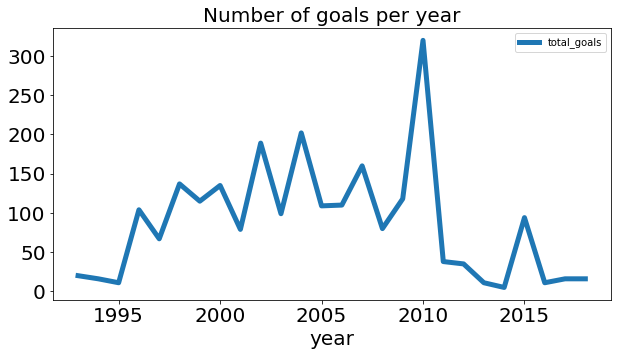

In [875]:
#Getting the number of goals per year
goals = new_data.copy()
goals['total_goals'] = goals.home_score + goals.away_score

GB = goals.groupby([goals.year]).sum()
GB.total_goals.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.title('Number of goals per year', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

2010 seem to have recorded the highest number of goals 

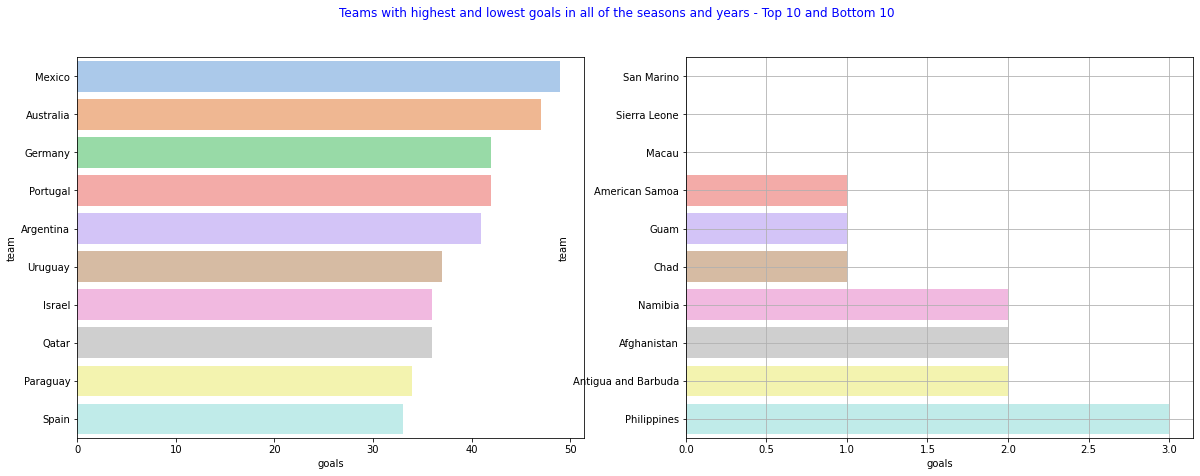

In [876]:
#Top 10 and Bottom 10 countries based on total goals scored over the years 
analysis = new_data.copy()
home_scores= pd.DataFrame(analysis.groupby(analysis.home_team)['home_score'].sum())
homes= home_scores.rename(columns= {"home_team" : "team"})
away_scores= pd.DataFrame(analysis.groupby(analysis.away_team)['away_score'].sum())
aways =away_scores.rename(columns= {"away_team" : "team"})
# Merge two Dataframes on index of both the dataframes
scores =homes.merge(aways,  left_index=True, right_index=True)
scores['team'] = scores.index
scores['goals'] = scores.home_score + scores.away_score
score =scores.sort_values(by='goals', ascending=False)
score.head()

fig, ((ax1, ax2))= plt.subplots(1,2, figsize=(20, 7)) # 
sns.barplot("goals","team",data=score[:10],palette="pastel",linewidth=1, ax=ax1)
sns.barplot("goals","team",data=score[:-11:-1],palette="pastel",linewidth=1, ax=ax2)

fig.suptitle("Teams with highest and lowest goals in all of the seasons and years - Top 10 and Bottom 10",color='b')
plt.grid(True)
plt.show()

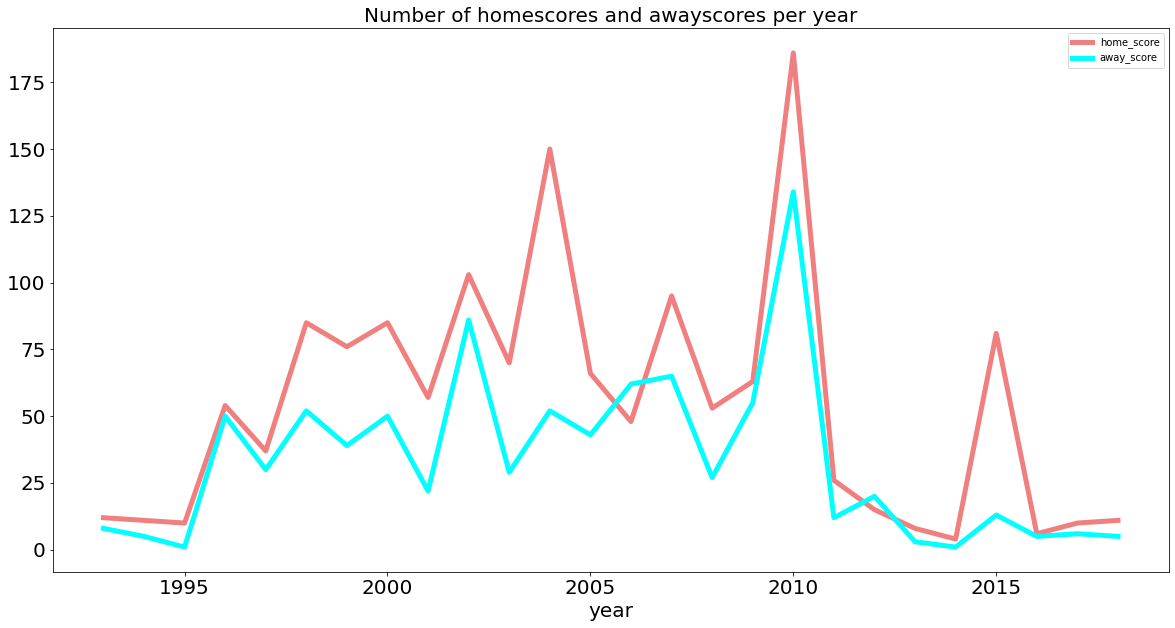

In [877]:
#Analysis of the homescore and away_scores over the years 
GB.home_score.plot(figsize=(20,10), linewidth=5, fontsize=20, color='lightcoral')
GB.away_score.plot(figsize=(20,10), linewidth=5, fontsize=20, color='cyan')
plt.title('Number of homescores and awayscores per year', fontsize=20)
plt.xlabel('year', fontsize=20);
plt.legend()

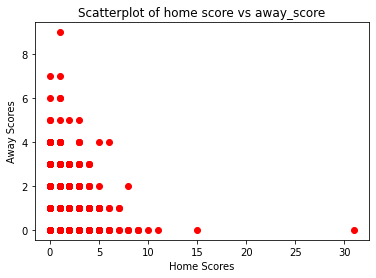

In [878]:
# Scatterplot of the homescore and away_colums columns
plt.scatter(x=new_data['home_score'], y=new_data['away_score'], c='red')
plt.title('Scatterplot of home score vs away_score')
plt.xlabel('Home Scores')
plt.ylabel('Away Scores')
plt.show()

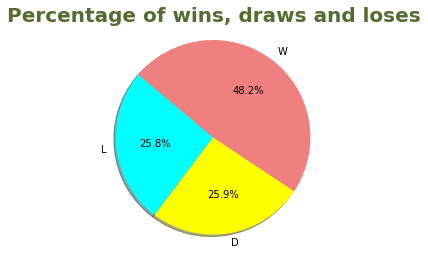

In [879]:
#The percentage of wins,draws and loses over the year
team_status = new_data[['home_score','status']]
new_df = new_data.groupby('status')['home_score'].count()
new_df =pd.DataFrame({'status':new_df.index, 'home_score':new_df.values})
new_df
homescore= new_df['home_score']
thestatus = new_df['status']
colors_list = ['cyan', 'yellow', 'lightcoral']
plt.title("Percentage of wins, draws and loses",
     color = 'darkolivegreen', fontweight = 'bold', fontsize = '20')
plt.pie(homescore, labels=thestatus, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors_list)
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

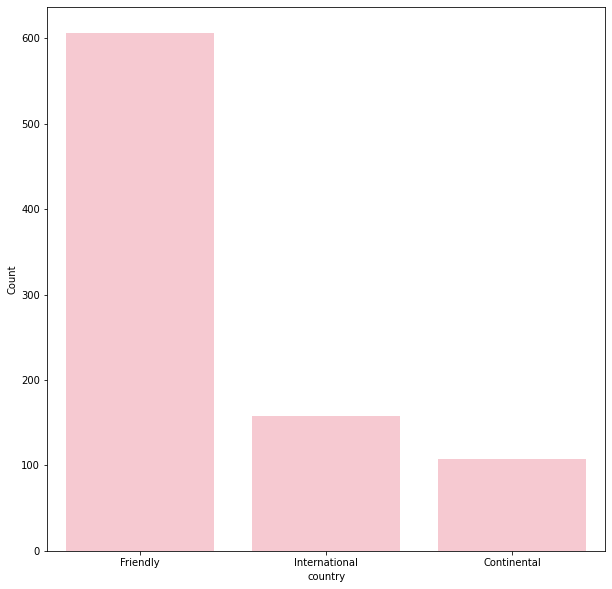

In [880]:
#Which tournament was recorded most
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(new_data.tournament_type, color='pink',saturation=0.7)

plt.xlabel('country')
plt.ylabel('Count')


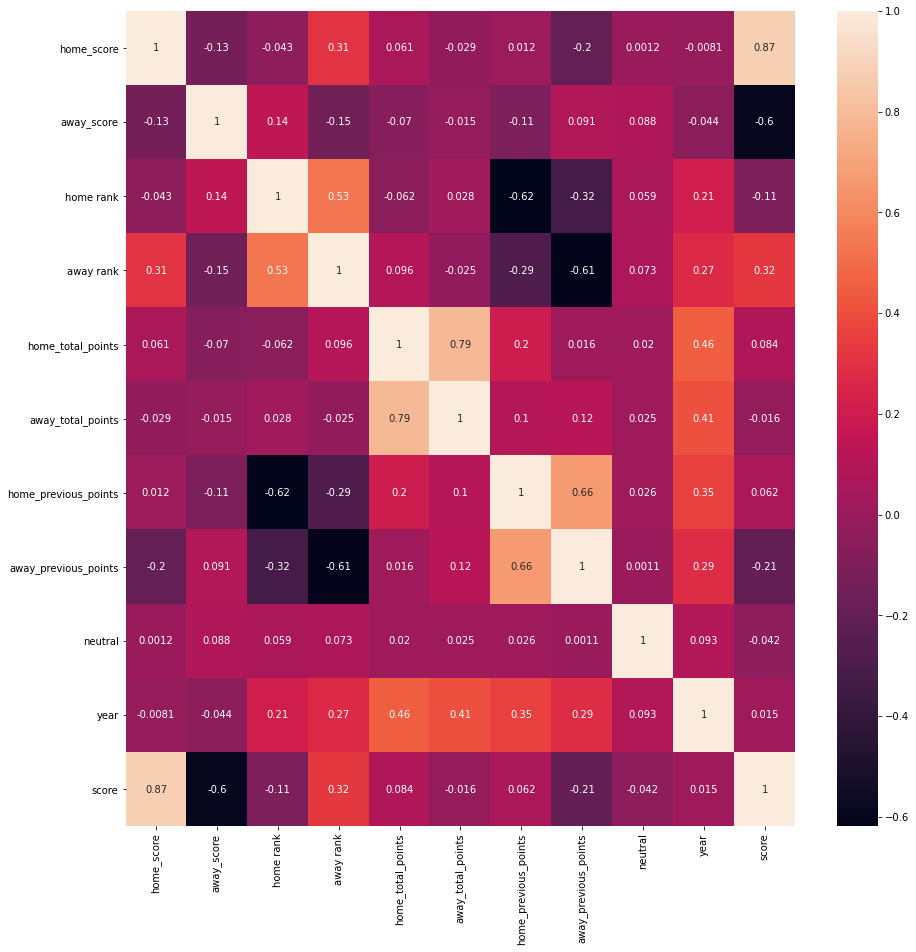

In [881]:
#correlation of each variable 
correlation_mat = new_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_mat,annot=True )
plt.show()

## Implementing the solution 

In [882]:
#Detecting multi-colinearity 
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only = new_data.iloc[:,2:6]
# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations

,home_score,away_score,home rank,away rank
home_score,1.000000,-0.132413,-0.043381,0.309322
away_score,-0.132413,1.000000,0.143060,-0.151524
home rank,-0.043381,0.143060,1.000000,0.534618
away rank,0.309322,-0.151524,0.534618,1.000000


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [883]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,home_score,away_score,home rank,away rank
home_score,1.186436,0.026235,0.338555,-0.544013
away_score,0.026235,1.103430,-0.338521,0.340060
home rank,0.338555,-0.338521,1.605364,-1.014273
away rank,-0.544013,0.340060,-1.014273,1.762051


Interpreting the table is straightforward: The VIF score for each variable is found alongside the downwards sloping diagonal. home_score has a score of 1.89, away_score has a score of 1.10, home_rank a score of 1.62 and away rank has a score of 1.8

There is none nearing 5 hence no multi-colinearity detected between the independent variables 

**Polynomial approach**

**Model 1 **

Do a home_score prediction given rank of home team 

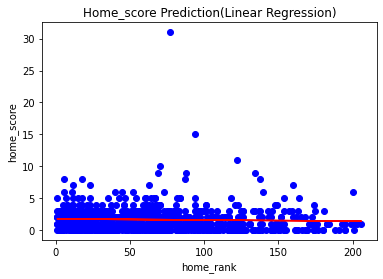

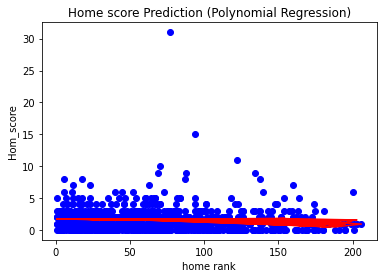

In [885]:
# X= Rank of home team 
# Y = Home_score 
X = new_data.iloc[:, 4].values
y = new_data.iloc[:, 2].values 
X = np.reshape(X, (-1,1))
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home_score Prediction(Linear Regression)')
plt.xlabel('home_rank')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 15) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score Prediction (Polynomial Regression)')
plt.xlabel('home rank')
plt.ylabel('Hom_score')
plt.show()
  
plt.show() 

Polynomial touches more values than linear hence might be more accurate in predicting. Also there is no overfitting in polynomial 

In [886]:
#display the intercept / bias
print(pol_reg.intercept_)

#display the coefficient
print(pol_reg.coef_)

1.7039879269220535
[ 0.00000000e+00 -1.13707891e-25  1.49765660e-29 -2.39293421e-32
 -6.33867880e-35 -6.05166548e-33 -5.73336004e-31 -5.07278744e-29
 -4.07815879e-27 -2.83735775e-25 -1.54980128e-23 -5.12397372e-22
  1.17528101e-23 -1.00392001e-25  3.78598916e-28 -5.32004425e-31]


coefficients are the values that multiply the predictor values in a model 
In our case we haave 15values as our degrees were also 15

is the expected mean value of dependent variable when all  dependent variables=0

In [887]:

# View the metrics
from sklearn import metrics

#MAE
print(metrics.mean_absolute_error(y_test, y_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[10.10]]))
print('Polynomial prediction: %d' %poly_pred)

#how well does my model fit 
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predict))


0.6674311926605505
1.0327215314245608
Polynomial prediction: 1
-0.5499644503566432


Lower values of RMSE indicate better fit.

However the RMSE is higher than 10%  of home_score total mean meaning the prediction is not the best.

The result -0.54 shows Negative R-squared  which is often encountered when you test a model (that has high bias and/or high variance)


**Model 2 **

Do a away_score prediction given rank of home team 

Rank of home teams

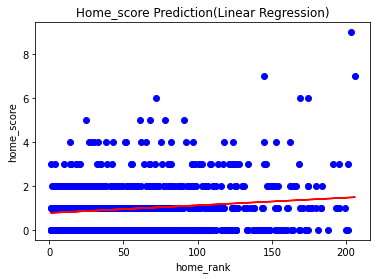

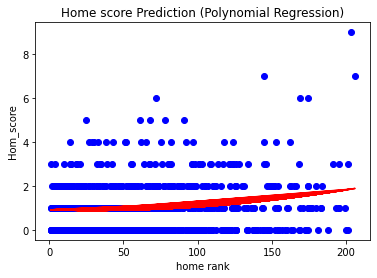

In [888]:
# X= Rank of home team 
# Y = away_score

X = new_data.iloc[:, 4].values
y = new_data.iloc[:, 3].values 
X = np.reshape(X, (-1,1))
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, reg_line.predict(X), color='red')
plt.title('Home_score Prediction(Linear Regression)')
plt.xlabel('home_rank')
plt.ylabel('home_score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score Prediction (Polynomial Regression)')
plt.xlabel('home rank')
plt.ylabel('Hom_score')
plt.show()
  
plt.show() 

Polynomial touches more values than linear hence might be more accurate in predicting. Also there is no overfitting in polynomial 

In [889]:
#display the intercept / bias
print(pol_reg.intercept_)

#display the coefficient
print(pol_reg.coef_)

0.9162694362302793
[ 0.00000000e+00 -1.83485604e-03  3.18180196e-05]


coefficients are the values that multiply the predictor values in a model 
In our case we haave 3values as our degrees were also 3

is the expected mean value of dependent variable when all  dependent variables=0

In [890]:

# View the metrics
from sklearn import metrics

#MAE
print(metrics.mean_absolute_error(y_test, y_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[10.10]]))
print('Polynomial prediction: %d' %poly_pred)

#how well does my model fit 
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predict))


0.6674311926605505
1.0327215314245608
Polynomial prediction: 0
-0.5499644503566432


Lower values of RMSE indicate better fit pf prediction.

However the RMSE is higher than 10%  of home_score total mean meaning the prediction is not the best.

The result -0.54 shows Negative R-squared  which is often encountered when you test a model (that has high bias and/or high variance)



**Logistic Approach**

In [891]:
#Checking for any correlation between variables 

# Encode labels in column 'status' and 'neutral
new_data['status']= label_encoder.fit_transform(new_data['status']) 
new_data['neutral']= label_encoder.fit_transform(new_data['neutral']) 
new_data['tournament_type']= label_encoder.fit_transform(new_data['tournament_type']) 
 

In [892]:
#Detecting correlations
# Remove the serial and admit chance columns, we want to focus on our independent variables only.
independent_only1 = new_data[['home_score','home_total_points', 'away_previous_points', 'tournament_type','neutral']] 
# Let's display the correlations between the variables
correlations1 = independent_only1.corr()
correlations1

,home_score,home_total_points,away_previous_points,tournament_type,neutral
home_score,1.000000,0.060914,-0.200664,0.128284,0.001156
home_total_points,0.060914,1.000000,0.015851,-0.063070,0.020065
away_previous_points,-0.200664,0.015851,1.000000,-0.039481,0.001105
tournament_type,0.128284,-0.063070,-0.039481,1.000000,-0.011926
neutral,0.001156,0.020065,0.001105,-0.011926,1.000000


In [893]:

from sklearn.preprocessing import StandardScaler
X = (independent_only1.values)
y = new_data['status']
X = StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state=25)

In [894]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [895]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [896]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 36,  45,  33],
       [ 27,  70,  20],
       [ 23,   2, 180]])

In [897]:
# sklearn accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


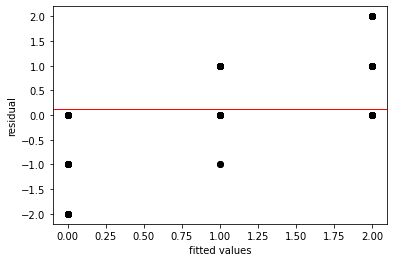

In [898]:
#residual plot 
import matplotlib.pyplot as plt
residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Using 'home_total_points', 'away_previous_points', 'tournament_type' , 'home_score' and 'neutral', the model  has 66% accuracy of predicting the status of the game. This is a fairly okay model for prediction. 

The mean is on close to 0 indicating also it is fairly correct 

This residual plot shows that there is no overfitting and underfitting of data 

In [899]:
#Checking for heteroskedascicity of model 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

467.4091559310991
the variances are homogeneous!


No heteroskedasticity of the data 

Heteroscedasticity makes coefficient estimates less precise. Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

## Challenging the Solution

**Cross validation and Hyperparameter turning of away score and away_rank**

Cross validation 

In [900]:

X = new_data.iloc[:, 4].values
y = new_data.iloc[:, 2].values 
X = np.reshape(X, (-1,1))
# Split the dataset into train and test sets
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)



# Do a cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)




array([ 0.00625799, -0.00244581, -0.01716263, -0.02208547,  0.0017152 ])

Hyperparameter turning

In [901]:
logistic = linear_model.LogisticRegression()

In [902]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [903]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [904]:
# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [905]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


Linear Regressipon on away_scores could be done on l2 penalty and C= 21.544 for the best prediction to give you moe accuracy of data 


## Conclusion




More analysis should be done especially on polynomial regression to see if tournament type and away rank interferences with model 1 and 2 


We could use another analysis other than polynomial regression to predict home_scores to improve accuracy 

Also more data should be collected for previous years for better prediction as our datset used for alaysis starts from 1993